## COMS5027A - HEALTH ANALYTICS
## 1156794 - Mothapo Regina
### K-Means Clustering 

This notebook aims to perform k-means clustering on air pollution data by finding the ideal number of clusters using the elbow method and performing Principal Component Analysis (PCA) to visualize the clusters ,finally save a CSV file for all the pollutants with their respective clusters.

In [1]:
# Imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from kneed import KneeLocator
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("airpoll spreadsheet.csv")
df

,SO2,NO2,O3,PM2.5,PM10
0,12.07,26.21,50.27,30.13,49.60
1,9.96,26.41,50.73,39.43,63.53
2,13.04,28.18,59.66,30.05,51.60
3,14.11,30.43,45.04,35.74,59.89
4,16.47,25.97,46.35,22.80,39.99
...,...,...,...,...,...
3342,12.82,29.93,45.13,28.47,46.54
3343,14.98,30.63,47.51,31.57,49.14
3344,10.09,27.85,57.20,38.67,52.52
3345,9.12,28.64,43.39,28.51,48.03


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3347 entries, 0 to 3346
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SO2     3347 non-null   float64
 1   NO2     3347 non-null   float64
 2   O3      3347 non-null   float64
 3   PM2.5   3347 non-null   float64
 4   PM10    3347 non-null   float64
dtypes: float64(5)
memory usage: 130.9 KB


In [4]:
df.isnull().sum()

SO2      0
NO2      0
O3       0
PM2.5    0
PM10     0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.describe()

,SO2,NO2,O3,PM2.5,PM10
count,3347.000000,3347.000000,3347.000000,3347.000000,3347.000000
mean,15.457774,30.233872,49.046191,30.840385,53.069074
std,7.958897,9.840317,13.678753,10.881879,19.495487
min,2.440000,5.310000,14.310000,7.250000,12.460000
25%,9.820000,23.340000,38.955000,23.265000,39.290000
50%,13.670000,28.620000,47.990000,29.130000,49.780000
75%,19.210000,35.270000,57.855000,36.260000,63.600000
max,63.570000,80.810000,103.910000,80.610000,131.750000


### Data Visualizations 

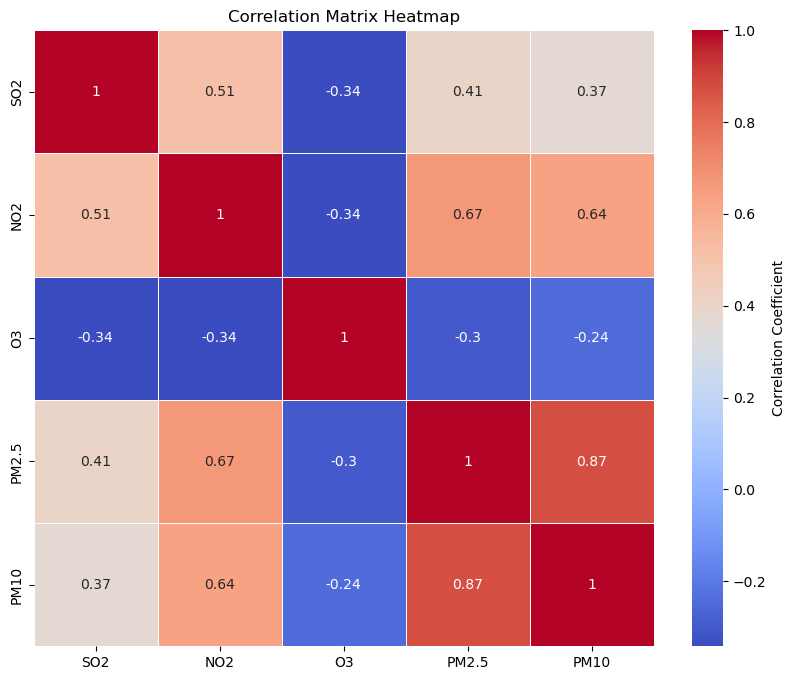

In [7]:
# correlation matrix
correlation_matrix = df.corr()

# heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5,cbar_kws={'label': 'Correlation Coefficient'})


plt.title('Correlation Matrix Heatmap')
plt.show()

### Distribution of each pollutant using Histplots

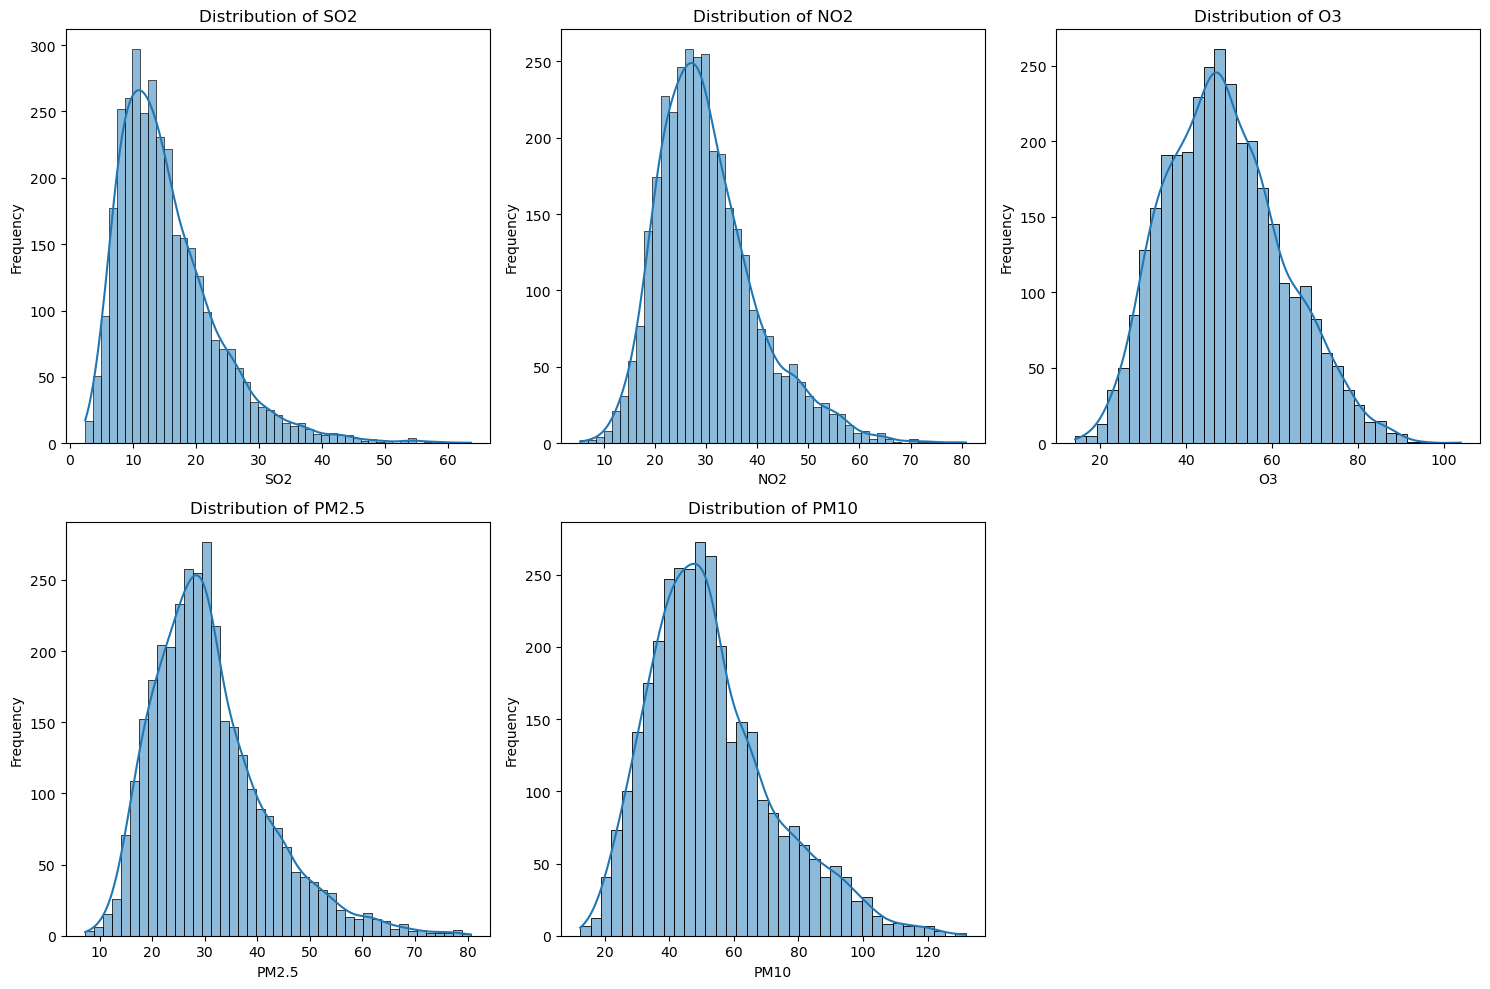

In [8]:
# figure size
plt.figure(figsize=(15, 10))

# Plot for SO2
plt.subplot(2, 3, 1)
sns.histplot(df['SO2'], kde=True)
plt.title('Distribution of SO2')
plt.xlabel('SO2')
plt.ylabel('Frequency')

# Plot for NO2
plt.subplot(2, 3, 2)
sns.histplot(df['NO2'], kde=True)
plt.title('Distribution of NO2')
plt.xlabel('NO2')
plt.ylabel('Frequency')

# Plot for O3
plt.subplot(2, 3, 3)
sns.histplot(df['O3'], kde=True)
plt.title('Distribution of O3')
plt.xlabel('O3')
plt.ylabel('Frequency')

# Plot for PM2.5
plt.subplot(2, 3, 4)
sns.histplot(df['PM2.5'], kde=True)
plt.title('Distribution of PM2.5')
plt.xlabel('PM2.5')
plt.ylabel('Frequency')

# Plot for PM10
plt.subplot(2, 3, 5)
sns.histplot(df['PM10'], kde=True)
plt.title('Distribution of PM10')
plt.xlabel('PM10')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### Distribution of each pollutant using boxplots

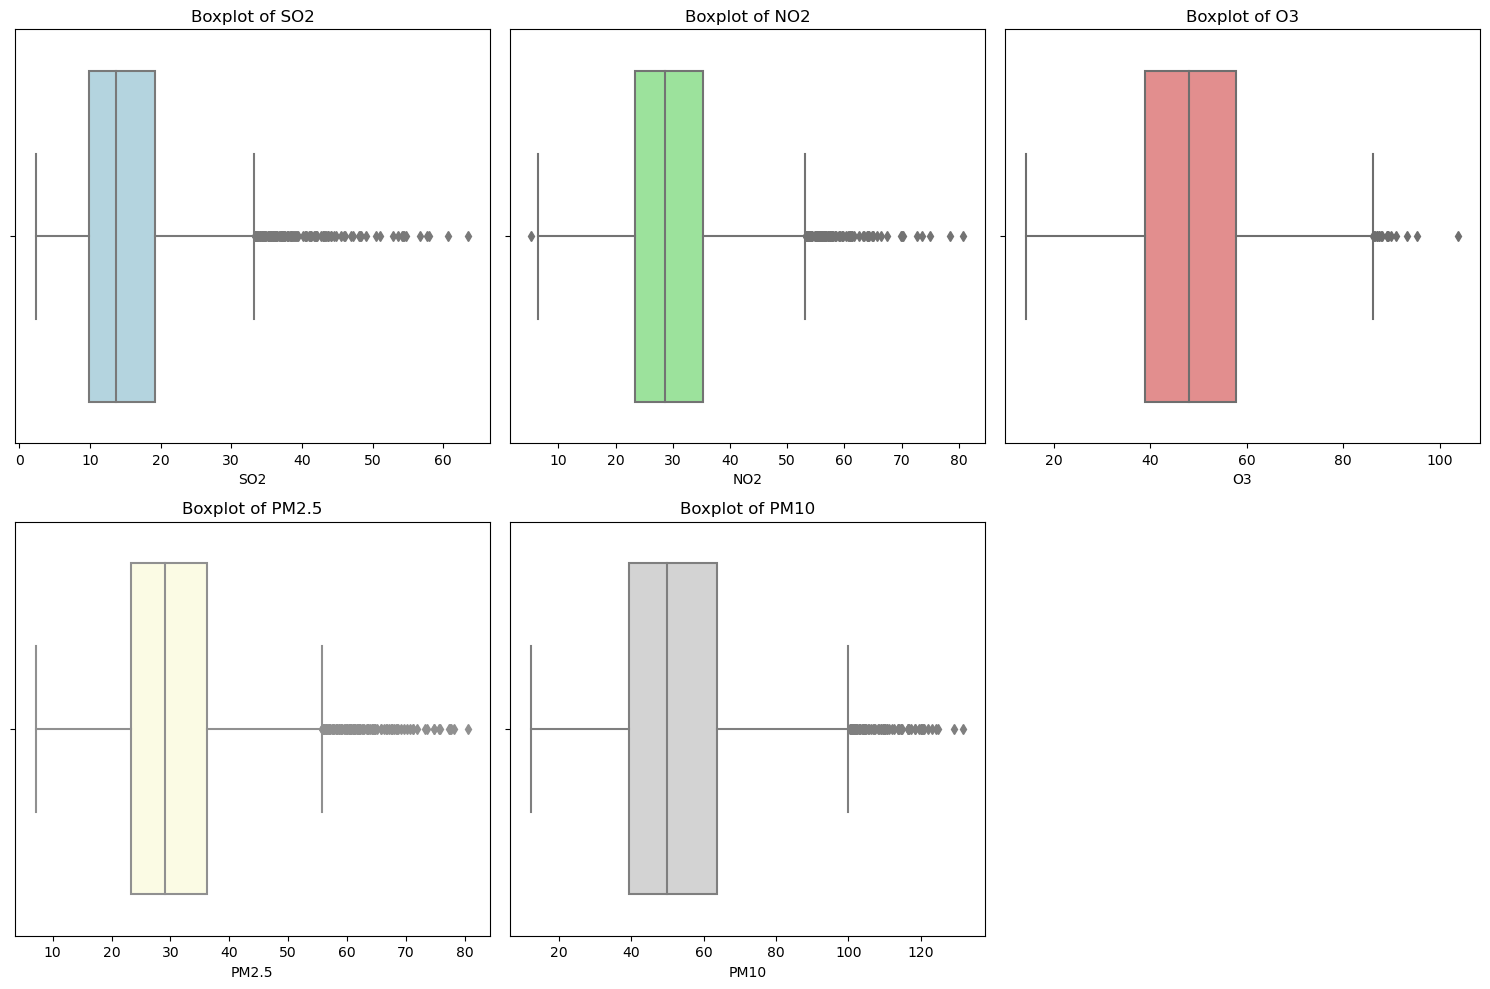

In [9]:
# figure size
plt.figure(figsize=(15, 10))

# Plot for SO2
plt.subplot(2, 3, 1)
sns.boxplot(x=df['SO2'], color='lightblue')
plt.title('Boxplot of SO2')
plt.xlabel('SO2')

# Plot for NO2
plt.subplot(2, 3, 2)
sns.boxplot(x=df['NO2'], color='lightgreen')
plt.title('Boxplot of NO2')
plt.xlabel('NO2')

# Plot for O3
plt.subplot(2, 3, 3)
sns.boxplot(x=df['O3'], color='lightcoral')
plt.title('Boxplot of O3')
plt.xlabel('O3')

# Plot for PM2.5
plt.subplot(2, 3, 4)
sns.boxplot(x=df['PM2.5'], color='lightyellow')
plt.title('Boxplot of PM2.5')
plt.xlabel('PM2.5')

# Plot for PM10
plt.subplot(2, 3, 5)
sns.boxplot(x=df['PM10'], color='lightgray')
plt.title('Boxplot of PM10')
plt.xlabel('PM10')

plt.tight_layout()
plt.show()


### Data PreProcessing with StandardScaler

In [10]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data to scale it
scaled_df = scaler.fit_transform(df)

# Convert back to a DataFrame
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)

scaled_df.head()

,SO2,NO2,O3,PM2.5,PM10
0,-0.425722,-0.408978,0.089481,-0.065291,-0.177969
1,-0.690874,-0.388650,0.123115,0.789468,0.536662
2,-0.303828,-0.208751,0.776050,-0.072644,-0.075366
3,-0.169367,0.019934,-0.292921,0.450322,0.349924
4,0.127201,-0.433371,-0.197137,-0.738989,-0.670977


### Optimal Number of clusters

In [11]:
# initialise kmeans parameters 
kmeans_kwargs = {"init":"random","n_init":10,"random_state": 1}

# create a list to hold SSE values for each k

sse = []

for k in range(1,11):
    kmeans = KMeans (n_clusters = k, **kmeans_kwargs)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)

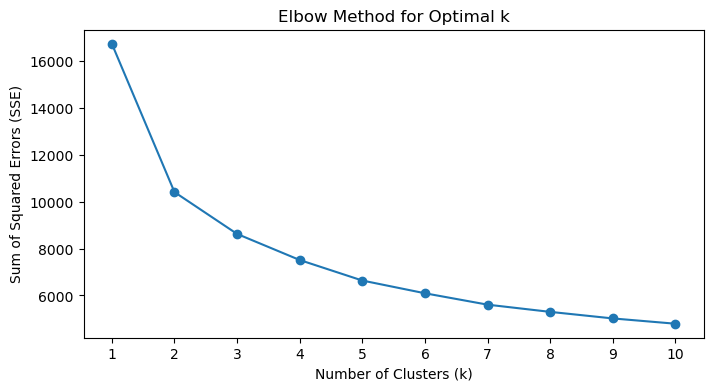

In [12]:
# Plotting the Elbow Method graph
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.xticks(range(1, 11))
plt.show()

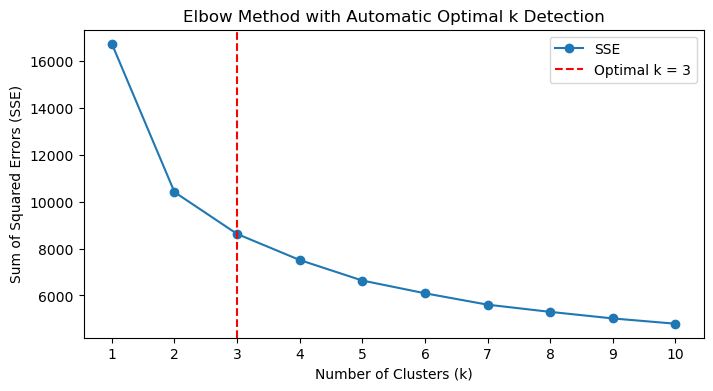

In [13]:
# Use KneeLocator to find the elbow point
kneedle = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
optimal_k = kneedle.elbow

# Plotting the Elbow Method graph with the detected elbow point
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), sse, marker='o', label='SSE')
plt.axvline(x=optimal_k, linestyle='--', color='red', label=f'Optimal k = {optimal_k}')
plt.title('Elbow Method with Automatic Optimal k Detection')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.xticks(range(1, 11))
plt.legend()
plt.show()

### Dimensionality Reduction using PCA

In [14]:
# Perform PCA to reduce the dimensions to 2D
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_df)

#### K-Means Clustering with optimal K

In [15]:
# optimal number of clusters 
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, **kmeans_kwargs)
kmeans.fit(scaled_df)

# Get cluster labels and cluster centers
labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_


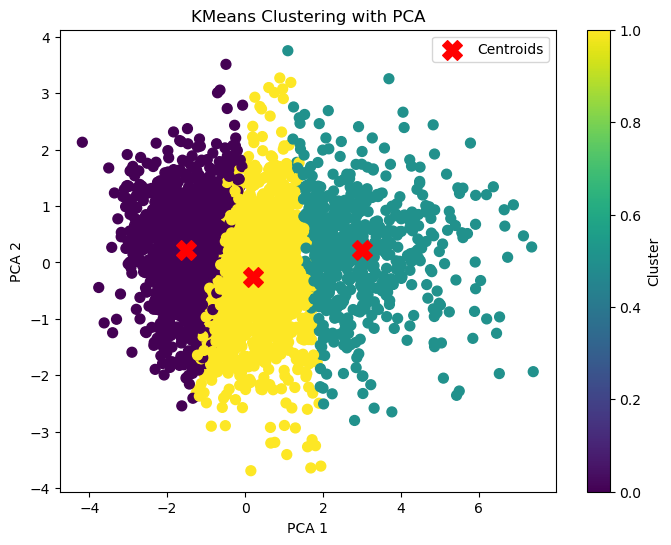

In [16]:
# Transform cluster centers to PCA space for visualization
pca_centers = pca.transform(cluster_centers)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(pca_centers[:, 0], pca_centers[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('KMeans Clustering with PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()


### Reverse StandardScaler transformation and Export file

In [17]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df) 

# Inverse transform to get the original data back
reversed_df = scaler.inverse_transform(scaled_df)
reversed_df = pd.DataFrame(reversed_df, columns=df.columns)  # Convert back to DataFrame

# Add the cluster labels as a new column
reversed_df['Cluster'] = labels

In [18]:
# Export the DataFrame to an Excel file
output_file = 'kmeans_clustered_data.xlsx'
reversed_df.to_excel(output_file, index=False)

print(f"Successfully Exported as {output_file}")

Successfully Exported as kmeans_clustered_data.xlsx
